# Classification problems with Keras

Classification is the task of reconize some item from a set of candidate targets. This is a very common task for Deep Learning technique, which is very well performed for example with image recogniction.

Yet, image recognition (which is a type of classification problem) takes as input images, which are composed of pixels distributed on a 2D dimension. We cannot simply unroll 2D image data into a 1D array of input, because spatial structure of the images is very important, information is in the structure of the data.

That's why when dealing with 2D problems, and particularly with images, we turn from simple Dense layers (which treat input as a 1D stream of data) to Convolutional layers.

## Convolutional Neural Network (CNNs)

(material from: <a href="http://neuralnetworksanddeeplearning.com/chap6.html#introducing_convolutional_networks">Neural Networks and Deep Learning - Chapter 6</a>)

Convolutional neural networks are biologically inspired variants of multilayer perceptrons, designed to emulate the behaviour of a visual cortex. CNNs are multi-layered feed-forward neural networks that are able to learn task-specific invariant features in a hierarchical manner. These models mitigate the challenges posed by the classic Multi-Layer Perceptron (MLP) architecture by exploiting the strong spatially local correlation present in natural images.

Convolutional neural networks (CNNs) use three basic ideas:
- local receptive fields
- shared weights
- pooling.

### Local Receptive Fields
we'll connect the input pixels to a layer of hidden neurons. But we won't connect every input pixel to every hidden neuron. Instead, we only make connections in small, localized regions of the input image. each neuron in the first hidden layer will be connected to a small region of the input neurons, say, for example, a 5×5 region, corresponding to 25 input pixels. So, for a particular hidden neuron, we might have connections that look like this:
<img src="imgs/convolution-stencil.png" width="50%">
That region in the input image is called the local receptive field for the hidden neuron. It's a little window on the input pixels. Each connection learns a weight. And the hidden neuron learns an overall bias as well. You can think of that particular hidden neuron as learning to analyze its particular local receptive field.

We then slide the local receptive field across the entire input image. For each local receptive field, there is a different hidden neuron in the first hidden layer. To illustrate this concretely, let's start with a local receptive field in the top-left corner:
<img src="imgs/convolution-stencil-sliding.png" width=50%>
the starting input image is a 28x28 pixel, using a convolution kernel of size 5x5, we map into an 24x24 output pixel image

### Shared weights

Each hidden neuron share the same weights and bias. This means that all the neurons in the first hidden layer detect exactly the same feature. Think of the feature detected by a hidden neuron as the kind of input pattern that will cause the neuron to activate: it might be an edge in the image, for instance, or maybe some other type of shape, just at different locations in the input image.

Yes, convolutional networks are well adapted to the translation invariance of images.

To do image recognition we'll need more than one feature map. And so a complete convolutional layer consists of several different feature maps. For example, if we use 3 different convolutional layers, than we can map 3 different features. 
<img src="imgs/convolution-features.png" width=50%>
Each feature map is defined by a set of shared weights, and a single shared bias. The result is that the network can detect 3 different kinds of features, with each feature being detectable across the entire image.

A big advantage of sharing weights and biases is that it greatly reduces the number of parameters involved in a convolutional network. For each feature map of our previous example we need 25=5×5 shared weights, plus a single shared bias. So each feature map requires 26 parameters. If we have 20 feature maps that's a total of 20×26=520 parameters defining the convolutional layer. By comparison, suppose we had a fully connected first layer, with 784=28×28 input neurons, and a relatively modest 30 hidden neurons. That's a total of 784×30 weights, plus an extra 30 biases, for a total of 23,550 parameters. The fully-connected layer would have more than 40 times as many parameters as the convolutional layer.

### Convolutional layers

Kesar provides <code><font color='red'>layers.Conv{<em>N</em>}D</font></code>  layer objects for convolution, where <em>N</em> is the number of dimension of the features for each input (1D, 2D, 3D). 

Important parameters are:
- <code>filters</code>: number of output filters (features to catch)
- <code>kernel_size</code>: size of the convolution window
- <code>strides</code>: define window shifting step (default 1)
- <code>padding</code>: One of "valid" or "same" (case-insensitive)
  - valid: no padding, stop at last valid element in window
  - same: use padding (default)

### Pooling Layers
Pooling is used in convolutional neural networks to make the detection of certain features invariant to scale and orientation changes. Pooling generalise over lower level, more complex information.

Pooling layers are usually used immediately after convolutional layers. 

Kesar provides <code><font color='red'>layers.Pooling2D</font></code>  layer objects for this purpose. Important parameters are:
- <code>pool_size</code>: size of the max pooling windows.
- <code>strides</code>: downscaling factor. If None, it will default to pool_size.
- <code>padding</code>: One of "valid" or "same" (case-insensitive).
  - valid: valid: no padding, stop at last valid element in window
  - same: use padding (default)
  
For example, a max-pooling layer with <code>pool_size=(2,2)</code> and <code>stride=None</code> will reduce an input 81x81 to an 41x41 output. Using <code>padding='valid'</code> will reduce output to 40x40, because no extra padding will be applied on original input shape.


<img src="imgs/Max-pooling.jpg" width=400pt>

### Dropout Layers
Recently the pooling approach has been often substituted or combined with a dropout. The drop out layer acts during training only. It simply turn off random fraction of input into the layer below, which helps prevent overfitting.

Kesar provides <code><font color='red'>layers.Dropout</font></code>  layer objects for this purpose. Important parameters are:
- <code>rate</code>: fraction of input unit to drop.
- <code>noise_shape</code>: shape of the binary dropout mask.
- <code>seed</code>: for random initialization.

## MNIST Benchmark


The MNIST data set is a standard set of handwritten numerical digits from 0 to 9 which is commonly used as the "Hello World" test for Deep Learning classification problem.

Keras comes with many dataset built in and automatically splits the data into a training and validation set.

In [1]:
# python module party :-)
%matplotlib inline

import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

# here we get access to the Keras MNIST dataset
from tensorflow.keras.datasets import mnist

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

We can rapidly develop a convolutional neural network in order to experiment with our image classification task. The first step will be to pre-process the data into a form that can be fed into a keras model

In [3]:
# let's have a look at the shape of the input training set
print("Input dataset has shape", x_train.shape, "and type", x_train.dtype)

Input dataset has shape (60000, 28, 28) and type uint8


Input data are numpy array of 60K samples each composed by a 28x28 pixel grayscale images.

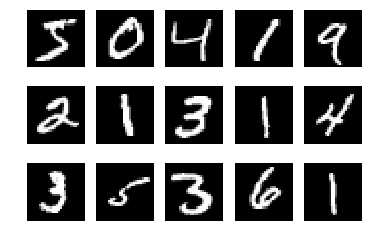

In [4]:
import matplotlib.pyplot as plt
plot_rows, plot_cols = 3 , 5
for n in range(plot_rows * plot_cols):
    plt.subplot(plot_rows, plot_cols, n+1)
    plt.imshow(x_train[n], cmap='gray'); plt.axis('off')

### Dataset normalization

When dealing with images as input, we must preprocess input training data in the manner the Keras backend describe an image. Images can be described in the following two ways:
- <b>channel_first:</b> (channels, width, height)
- <b>channel_last:</b> (width, height, channels)

The MNIST input images have a depth of 1, so channels is 1 because they are simple greyscale images.

We need to reshape the input with a channel information:

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In order to decrease waiting time for training process, let's reduce the number of samples to use in this tutorial.

In [6]:
#sub-sample of test data to improve training speed. Comment out
#if you want to train on full dataset.
x_train_full = x_train # for later use
y_train_full = y_train # for later use
x_train = x_train[:20000,:,:,:]
y_train = y_train[:20000]

As we already observed, input samples are integers. Neural network layers work on float. We need to cast (change the type) of the input to float32 type.

It is also convenient, for convergency reasons, to normalize the input range values between [0,1].

In [7]:
#normalise the images and double check the shape and size of the image data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples of type', x_train.dtype)
print(x_test.shape[0],  'test  samples of type', x_test.dtype)

x_train shape: (20000, 28, 28, 1)
20000 train samples of type float32
10000 test  samples of type float32


### Build categorical matrices

The y_train is of course just a 60K sequence of numbers from 0 to 9, which represent the set in the category.

In [8]:
# what about the y_tain data?
y_train.shape

(20000,)

We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array. We should represent them into a categorical matrix, so that for each index we have an array of 10 element with 1 on the right label and 0 otherwise.

In [9]:
import tensorflow.keras.utils as np_utils
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train_indexes = y_train.copy() # for later use
y_test_indexes = y_test.copy()   # for later use
y_train = np_utils.to_categorical(y_train_indexes, 10)
y_test = np_utils.to_categorical(y_test_indexes, 10)

In [10]:
# let's have a look at the new format
y_train[1:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Build the model

In [11]:
# Create a convolutional multi-layer using max-pooling and dropout
# uncomment layers to produce more accurate training

# number of classes
nb_classes = 10
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)


model = Sequential()
model.add(Conv2D(nb_filters, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
#model.add(Conv2D(64, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25)) # try out SpatialDropout2D

# now let's add a fully connected layer ...
model.add(Flatten()) # transform 2D output into a 1D to feed the Dense layer
#model.add(Dense(256, input_shape=input_shape, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# ... and the final layer which has an output size of nb_classes
# corresponding to the size of our category items to match
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


## Model Fitting

Now we are going to train out model (or uncomment the load_model code to restore a previous one without going through the optimization process).

In [12]:
batch_size = 128
epochs = 10
restore_model=False

if restore_model:
    model = keras.models.load_model("saved/mnist_model")
else:
    model.fit(x_train, y_train, 
              batch_size=batch_size, 
              epochs=epochs,
              validation_data=(x_test, y_test))

Train on 20000 samples, validate on 10000 samples
Epoch 1/10
20000/20000 [==============================] - 12s 589us/step - loss: 0.6775 - acc: 0.8120 - val_loss: 0.3051 - val_acc: 0.9112
Epoch 2/10
20000/20000 [==============================] - 11s 533us/step - loss: 0.3152 - acc: 0.9085 - val_loss: 0.2249 - val_acc: 0.9345
Epoch 3/10
20000/20000 [==============================] - 10s 524us/step - loss: 0.2507 - acc: 0.9270 - val_loss: 0.1895 - val_acc: 0.9454
Epoch 4/10
20000/20000 [==============================] - 11s 553us/step - loss: 0.2111 - acc: 0.9380 - val_loss: 0.1592 - val_acc: 0.9549
Epoch 5/10
20000/20000 [==============================] - 10s 479us/step - loss: 0.1876 - acc: 0.9449 - val_loss: 0.1418 - val_acc: 0.9600
Epoch 6/10
20000/20000 [==============================] - 10s 478us/step - loss: 0.1671 - acc: 0.9505 - val_loss: 0.1311 - val_acc: 0.9623
Epoch 7/10
20000/20000 [==============================] - 10s 525us/step - loss: 0.1556 - acc: 0.9541 - val_loss: 0.

Once your model has been trained, let's evaluate its score on data not used during traing (also known as the test data set). The evaluate method returns a list of two element: the first is the <font color='red'>score</font>, the second is the <font color='red'>accuracy</font>.

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 97.16%


## Test the model

Let's inspect the output of our model. We expect to be a probability distribution over the set of possible category elements of our dataset [0-9]. For example, let's select a random input from the x_test data and see how the output of our model looks like. We use the <font color='red'>predict_proba</font> model method. 

In [14]:
def plot_digit_and_probability(image, matrix_probs, text=None):
    plt.figure(figsize=(8,4));
    plt.subplot(1, 2, 1);
    if text is not None:
        plt.title('Example of digit: {}'.format(text));
    plt.imshow(image, cmap='gray'); plt.axis('off');
    plt.subplot(1, 2, 2);
    plt.title('Probabilities for each digit class');
    plt.bar(np.arange(10), matrix_probs.reshape(10), align='center'); 
    plt.xticks(np.arange(10), np.arange(10).astype(str));

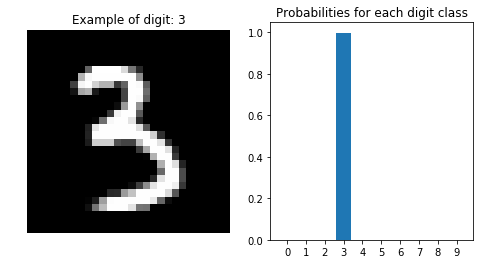

In [15]:
#choose a random data from test set and show probabilities for each class.
i = 32 # np.random.randint(0, len(x_test))
digit = x_test[i].reshape(28,28)
probs = model.predict_proba(digit.reshape(1,28,28,1),batch_size=1)
plot_digit_and_probability(digit, probs, y_test_indexes[i])

When the probability is sharp over a digit, the prediction is very accurate and the result is correct.

### Inspect Wrong Predictions

What about "wrong results"? Let's have a look ...

In [16]:
# returns an array of class prediction for the input sample
# that is an array of recognized digit for each input
predictions = model.predict_classes(x_test, batch_size=32, verbose=1)

print("Class prediction array contains: ", predictions)

10000/10000 [==============================] - 1s 135us/step
Class prediction array contains:  [7 2 1 ... 4 5 6]


In [17]:
# construct a list of indexes
predicted_indexes = np.arange(len(predictions))

# for each predicted result select those which are not correct
wrong_results = predicted_indexes[y_test_indexes!=predictions]


print("There are ", len(wrong_results), "wrong predictions over", len(predictions))

There are  284 wrong predictions over 10000



If we inspect the probability distribution of wrong result predictions we find that the higher probability is not the only sharp peak over a digit, but other stronger peaks exist, not always on the right result. Probabilities are in general lower and more spread between classes than for a correctly labelled digit.

element 8
element 92


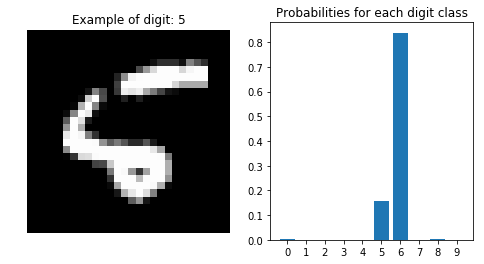

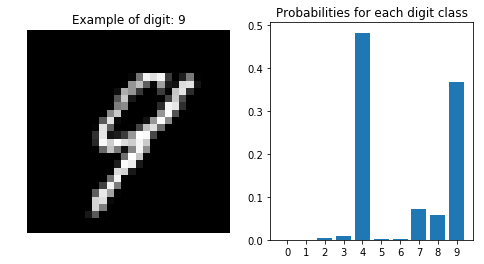

In [18]:
wrong_samples=2

for n in range(wrong_samples):
    i = wrong_results[n] # np.random.randint(0, len(x_test))
    print('element', i)
    digit = x_test[i].reshape(28,28)
    probs = model.predict_proba(digit.reshape(1,28,28,1),batch_size=1)
    plot_digit_and_probability(digit, probs, y_test_indexes[i])

## Visualize Convolution Weights

In order to visualize what a convolution layer has learned, we can reconstruct a new neural network without the last catergorization layers, that is without the linearization and the softmax classification steps.

In [19]:
layer = K.function([model.layers[0].input], [model.layers[0].output])
l = layer([x_test])[0]
l.shape

(10000, 26, 26, 32)

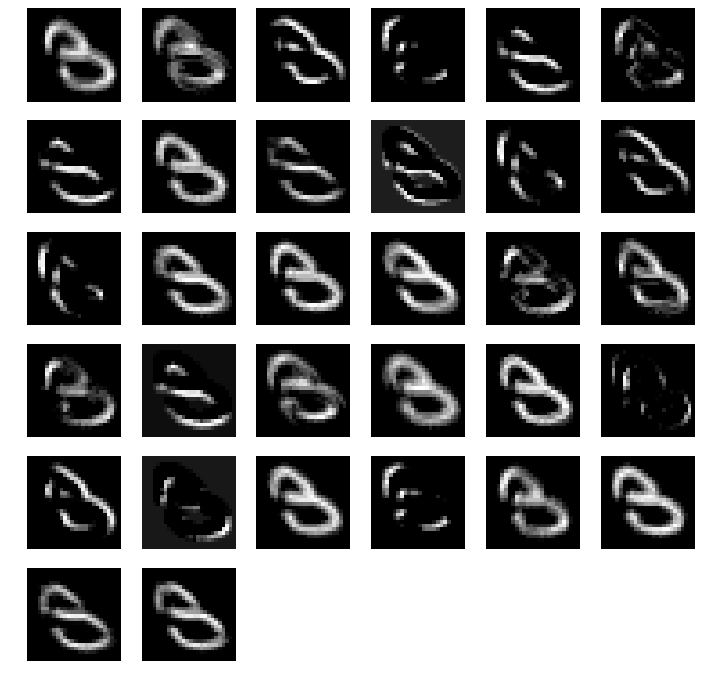

In [20]:
# visualize output of each convolution filter for a selected item
def visualize_convolution_output(index):
    plt.figure(figsize=(12,12));

    for n in range(nb_filters):
        plt.subplot(6,6,n+1); 
        plt.imshow(l[index,:,:,n], cmap='gray')
        plt.axis('off')

# select one item (index) from the dataset
item = 18
visualize_convolution_output(item)

# Exercises

1. Play with model's parameters to enhance accuracy:
  - number of convolution filters (<code>nb_filters</code>)
  - convolution window (<code>kernel_size</code>)

1. Try add stride, padding to Convolution and MaxPooling layers

1. Add extra Conv2D, Dense, Dropout layers (uncomment them)

1. Try to use only Dense layers and achieve comparable accuracy with this CNN model. How many parameters are you using with the respect the CNN one?

1. Try to classify images from the
   <a href='https://keras.io/datasets/#cifar10-small-image-classification'>CIFAR10</a> using Convolution layers.